In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import torch
import utils
from models import DIP

In [26]:
# clean = utils.load_celeba(10)
clean = utils.load_images('./data/celeba10/')
# clean = utils.load_image('./data/set5/butterfly.png')
noisy = torch.stack([utils.get_noisy_image(img, 0.05) for img in clean])

In [27]:
input_channels = 3
deep_channels = [8, 16, 32, 64, 128]
skip_channels = [0, 0, 0, 4, 4]

dip = DIP(input_channels, deep_channels, skip_channels, epochs=2400)

denoised = []
for i in range(len(noisy)):
  denoised.append(dip.denoise(noisy[[i]], id=i, verbose=False))
denoised = torch.cat(denoised)

0: Training on cuda:0
----------
Finished training in 00:01:03

1: Training on cuda:0
----------
Finished training in 00:01:01

2: Training on cuda:0
----------
Finished training in 00:01:01

3: Training on cuda:0
----------
Finished training in 00:01:01

4: Training on cuda:0
----------
Finished training in 00:01:02

5: Training on cuda:0
----------
Finished training in 00:01:02

6: Training on cuda:0
----------
Finished training in 00:01:02

7: Training on cuda:0
----------
Finished training in 00:01:02

8: Training on cuda:0
----------
Finished training in 00:01:06

9: Training on cuda:0
----------
Finished training in 00:01:07



In [28]:
from torchvision.transforms.functional import gaussian_blur

denoised = denoised.detach().cpu()
noisy = noisy.cpu()
blurred = gaussian_blur(clean, (5, 5))

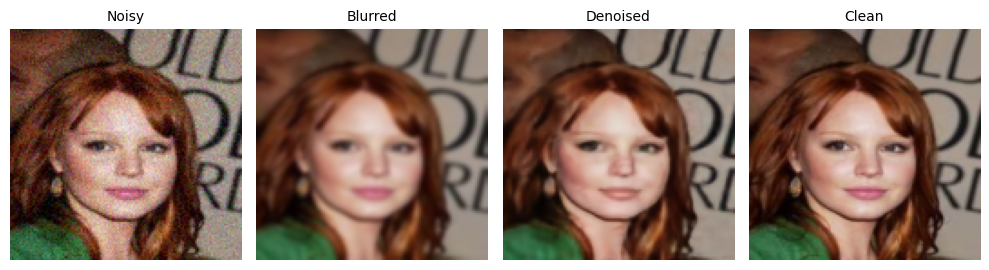

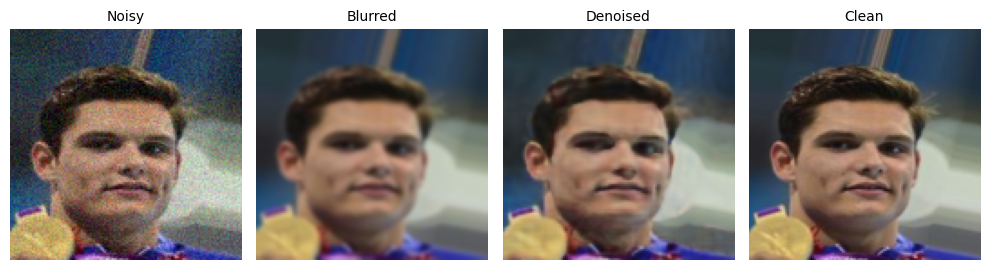

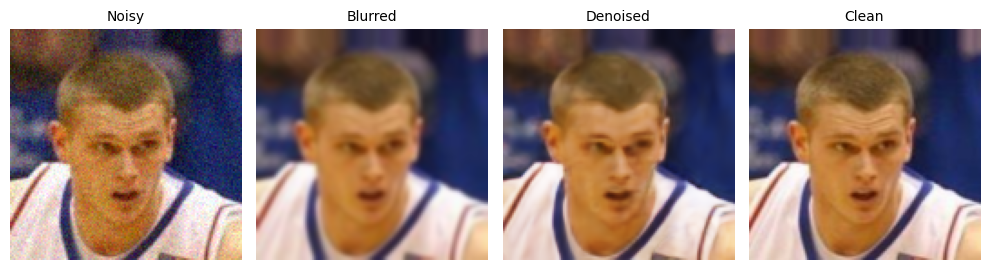

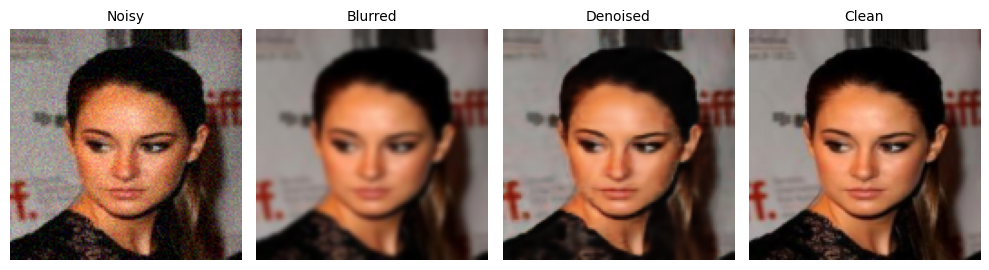

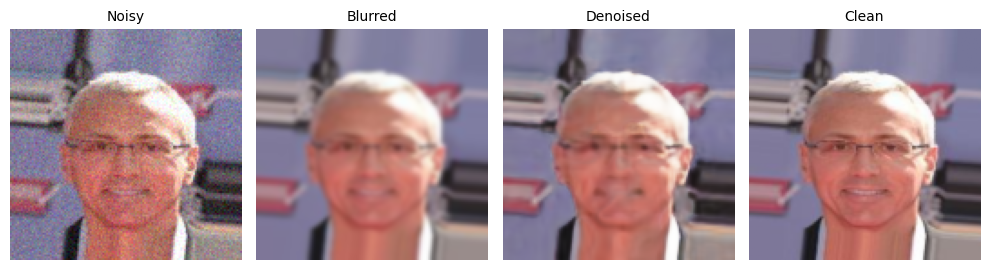

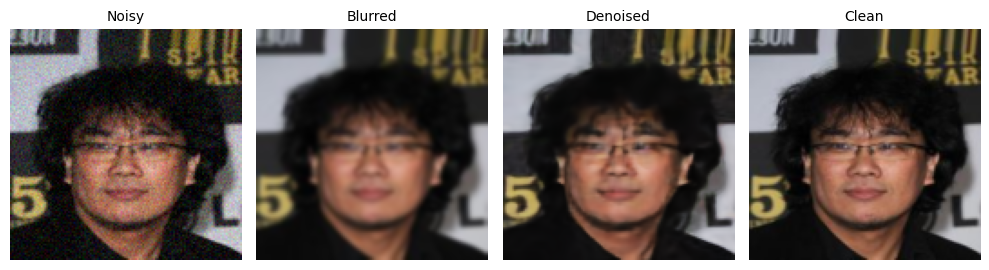

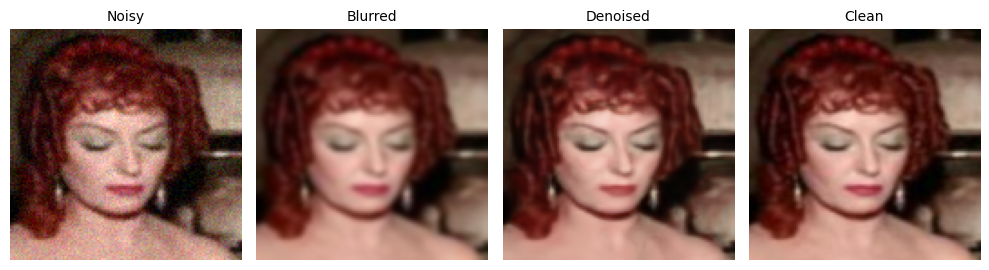

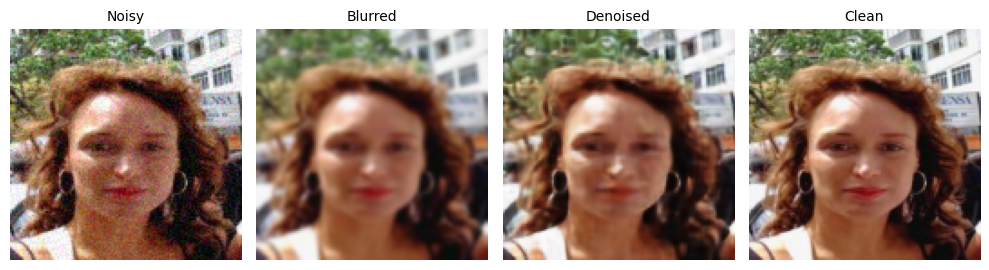

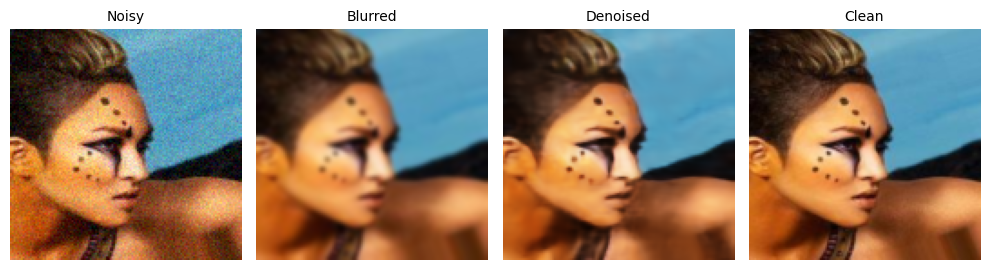

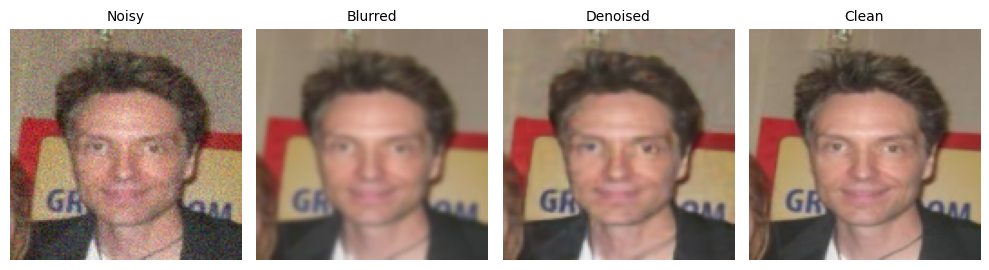

In [29]:
for n, b, d, c in zip(noisy, blurred, denoised, clean):
  utils.plot_row([n, b, d, c], ['Noisy', 'Blurred', 'Denoised', 'Clean'])

In [30]:
from torchmetrics.image import PeakSignalNoiseRatio, StructuralSimilarityIndexMeasure

psnr = PeakSignalNoiseRatio(reduction=None, data_range=1, dim=[1, 2, 3])
noisy_psnr = psnr(noisy, clean)
blurred_psnr = psnr(blurred, clean)
denoised_psnr = psnr(denoised, clean)

print('PSNR:')
print('----------')
print('Mean:')
print(f'Noisy:\t\t{noisy_psnr.mean()}')
print(f'Blurred:\t{blurred_psnr.mean()}')
print(f'Denoised:\t{denoised_psnr.mean()}')
print('\nElement-wise:')
print(f'Noisy:\t\t{noisy_psnr.tolist()}')
print(f'Blurred:\t{blurred_psnr.tolist()}')
print(f'Denoised:\t{denoised_psnr.tolist()}')

PSNR:
----------
Mean:
Noisy:		26.228954315185547
Blurred:	31.0209903717041
Denoised:	32.47323226928711

Element-wise:
Noisy:		[26.18364143371582, 26.033266067504883, 26.1201229095459, 26.507858276367188, 26.068716049194336, 26.49526023864746, 26.33492088317871, 26.21244239807129, 26.3045654296875, 26.028778076171875]
Blurred:	[29.766122817993164, 31.530027389526367, 30.91351890563965, 30.84256935119629, 31.766094207763672, 30.0495662689209, 34.22946548461914, 26.379167556762695, 30.915279388427734, 33.818077087402344]
Denoised:	[31.837697982788086, 31.79587745666504, 33.882972717285156, 33.14448928833008, 33.590797424316406, 33.02128219604492, 34.04249572753906, 28.379491806030273, 32.03106689453125, 33.006141662597656]


In [31]:
ssim = StructuralSimilarityIndexMeasure(reduction=None, data_range=1)
noisy_ssim = ssim(noisy, clean)
blurred_ssim = ssim(blurred, clean)
denoised_ssim = ssim(denoised, clean)

print('SSIM:')
print('----------')
print('Mean:')
print(f'Noisy:\t\t{noisy_ssim.mean()}')
print(f'Blurred:\t{blurred_ssim.mean()}')
print(f'Denoised:\t{denoised_ssim.mean()}')
print('\nElement-wise:')
print(f'Noisy:\t\t{noisy_ssim.tolist()}')
print(f'Blurred:\t{blurred_ssim.tolist()}')
print(f'Denoised:\t{denoised_ssim.tolist()}')

SSIM:
----------
Mean:
Noisy:		0.6314021944999695
Blurred:	0.9311294555664062
Denoised:	0.9213811755180359

Element-wise:
Noisy:		[0.7093387246131897, 0.5792913436889648, 0.592675507068634, 0.6277036070823669, 0.5752803087234497, 0.6643552184104919, 0.6363380551338196, 0.779695451259613, 0.5907655954360962, 0.5585780739784241]
Blurred:	[0.9210106730461121, 0.9349315166473389, 0.9475597739219666, 0.9323185086250305, 0.9407424926757812, 0.929492175579071, 0.9608897566795349, 0.8639577031135559, 0.9339259266853333, 0.9464665055274963]
Denoised:	[0.9243516325950623, 0.9252634048461914, 0.9314286112785339, 0.8945057392120361, 0.9328323006629944, 0.9311844706535339, 0.9339044690132141, 0.9002164006233215, 0.9127617478370667, 0.9273635745048523]
